In [39]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout

In [24]:
# Carregando Dados
data_dir = './data'

# Configurações
batch_size = 32
img_height = 180
img_width = 180
num_classes = 2
epochs = 25


# Gerador de dados
# Treinamento
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Teste
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 20 files belonging to 2 classes.
Using 16 files for training.


Found 20 files belonging to 2 classes.
Using 4 files for validation.


In [25]:
class_names = train_ds.class_names
print(class_names)

['cachorro', 'gato']


In [26]:
# Modelo
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
# Compilar
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [32]:
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 0.2030
Epoch 2/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss: 0.1861
Epoch 3/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - accuracy: 1.0000 - loss: 7.7664e-04 - val_accuracy: 1.0000 - val_loss: 0.1843
Epoch 4/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 1.0000 - loss: 5.1599e-04 - val_accuracy: 1.0000 - val_loss: 0.2105
Epoch 5/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 1.0000 - loss: 3.0292e-04 - val_accuracy: 0.7500 - val_loss: 0.2777
Epoch 6/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 1.0000 - loss: 1.6414e-04 - val_accuracy: 0.7500 - val_loss: 0.3939
Epoch 7/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 1.0000 - loss: 8.8551e-05 - val_accuracy: 0.7500 - val_loss: 0.5568
Epoch 8/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 1.0000 - loss: 4.9475e-05 - val_accu

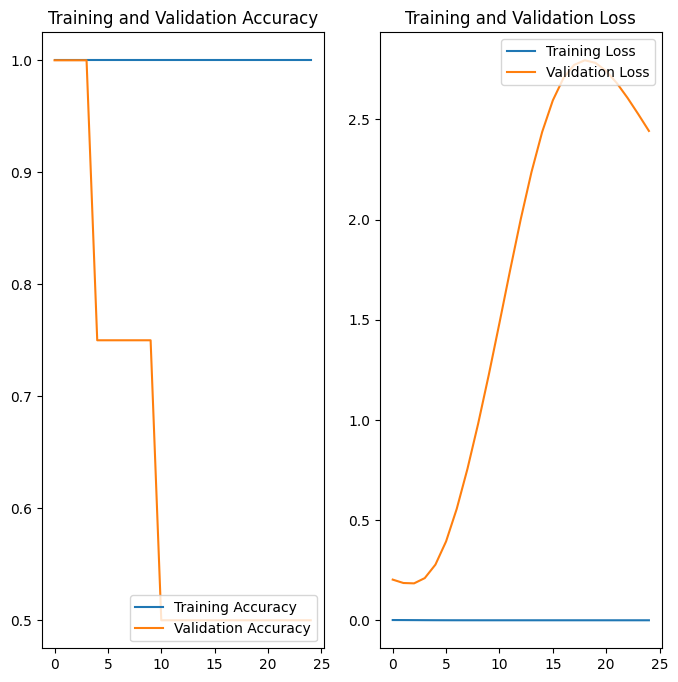

In [33]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [34]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [35]:
# import modelo
model.save('meu_modelo.h5')

In [41]:
# Testando Modelo

# carregando modelo
model = load_model('meu_modelo.h5')
# Carregando Imagem
image_path = 'gato.jpg'

img = tf.keras.utils.load_img(
    image_path, target_size=(img_height, img_width)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print("A imagem foi classificada como {} com {:.0f}% de certeza."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
A imagem foi classificada como gato com 100% de certeza.
